### Import Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Load and clean data

In [7]:
df = pd.read_csv('FuelConsumption.csv')
df.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [13]:
cdf = df [['ENGINESIZE', 'CYLINDERS', 'FUELCONSUMPTION_COMB', 'CO2EMISSIONS']]
X = cdf [['ENGINESIZE', 'CYLINDERS', 'FUELCONSUMPTION_COMB']].values
y = cdf[['CO2EMISSIONS']].values

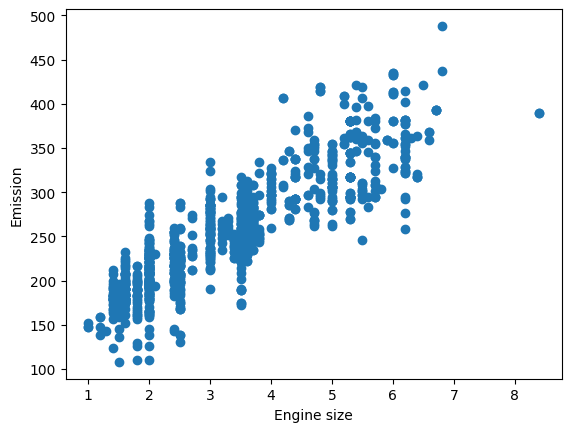

In [37]:
plt.scatter(cdf.ENGINESIZE, cdf.CO2EMISSIONS)
plt.xlabel("Engine size")
plt.ylabel("Emission")
plt.show()

In [17]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=4)

### Modeling

In [21]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model
poly = PolynomialFeatures(degree=2)
train_x_poly = poly.fit_transform(X_train)
train_x_poly

array([[  1.  ,   1.5 ,   4.  , ...,  16.  ,  34.  ,  72.25],
       [  1.  ,   1.8 ,   4.  , ...,  16.  ,  35.6 ,  79.21],
       [  1.  ,   3.6 ,   6.  , ...,  36.  ,  69.  , 132.25],
       ...,
       [  1.  ,   2.  ,   4.  , ...,  16.  ,  28.8 ,  51.84],
       [  1.  ,   5.3 ,   8.  , ...,  64.  , 132.  , 272.25],
       [  1.  ,   6.2 ,   8.  , ...,  64.  , 118.4 , 219.04]])

In [31]:
clf = linear_model.LinearRegression()
y_train_ = clf.fit(train_x_poly, y_train)
# The coefficients
print ('Coefficients: ', clf.coef_)
print ('Intercept: ',clf.intercept_)

Coefficients:  [[  0.           5.89690283 -12.72306388  29.76888174   4.26854049
  -11.43132402   3.35632386   2.71590356   2.03879567  -1.64052294]]
Intercept:  [7.6285112]


### Evaluation

In [33]:
from sklearn.metrics import r2_score

test_x_poly = poly.fit_transform(X_test)
y_hat = clf.predict(test_x_poly)

print("Mean absolute error: %.2f" % np.mean(np.absolute(y_hat - y_test)))
print("Residual sum of squares (MSE): %.2f" % np.mean((y_hat - y_test) ** 2))
print("R2-score: %.2f" % r2_score(y_test,y_hat ) )

Mean absolute error: 9.35
Residual sum of squares (MSE): 264.32
R2-score: 0.93
